# CS438 FINAL PROJECT

by Ryan Zurrin

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Install necessary libraries
!pip install --quiet pandas scikit-learn matplotlib seaborn numpy tqdm pydicom

import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3
import seaborn as sns
import numpy as np
from utils.helpers import *
train_sizes = np.linspace(0.1, 1.0, 10)
cv = 5
scoring = 'neg_log_loss'

## Logistic Regresssion - First attempt

### Using Full Dataset and initial engeneered dataset as discussed in paper

In [3]:
csv_path = "labels/features_scaled.csv"

In [4]:
features = pd.read_csv(csv_path)

In [5]:
features.columns

Index(['ImageLaterality', 'PatientAge', 'Manufacturer',
       'ManufacturerModelName', 'DistanceSourceToDetector',
       'DistanceSourceToPatient', 'ExposureTime', 'XRayTubeCurrent',
       'Exposure', 'KVP', 'BodyPartThickness', 'CompressionForce',
       'PositionerPrimaryAngle', 'ViewPosition', 'DetectorTemperature',
       'DetectorType', 'Rows', 'Columns', 'target_label', 'FieldOfViewOrigin1',
       'FieldOfViewOrigin2', 'WindowCenter1', 'WindowCenter2', 'WindowCenter3',
       'WindowCenter4', 'WindowWidth1', 'WindowWidth2', 'WindowWidth3',
       'WindowWidth4', 'histogram_median', 'histogram_std', 'histogram_min',
       'histogram_max', 'histogram_percentile_25', 'histogram_percentile_50',
       'histogram_percentile_75', 'flattened_image_mean',
       'flattened_image_median', 'flattened_image_std', 'flattened_image_min',
       'flattened_image_max', 'flattened_image_percentile_25',
       'flattened_image_percentile_50', 'flattened_image_percentile_75'],
      dtype='ob

In [6]:
len(features)

161299

In [7]:
# Separate the features and target label
X = features.drop('target_label', axis=1)
y = features['target_label']

In [8]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [9]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=2000)

# Fit the model
log_reg.fit(X_train, y_train)

# Validate the model
y_val_pred = log_reg.predict(X_val)
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.59      0.00      0.01      3322
           1       0.90      1.00      0.95     28938

    accuracy                           0.90     32260
   macro avg       0.74      0.50      0.48     32260
weighted avg       0.87      0.90      0.85     32260



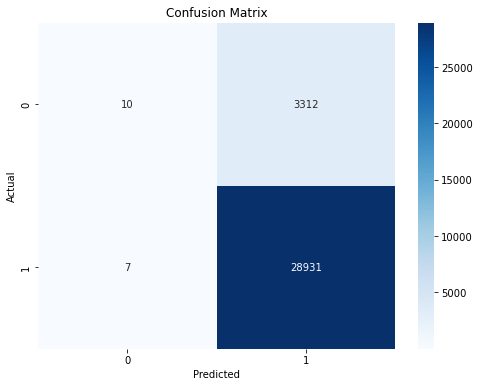

In [10]:
plot_confusion_matrix(y_val, y_val_pred)

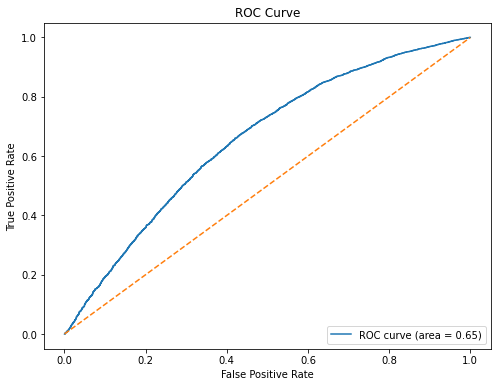

In [11]:
y_prob = log_reg.predict_proba(X_val)[:, 1]
plot_roc_curve(y_val, y_prob)

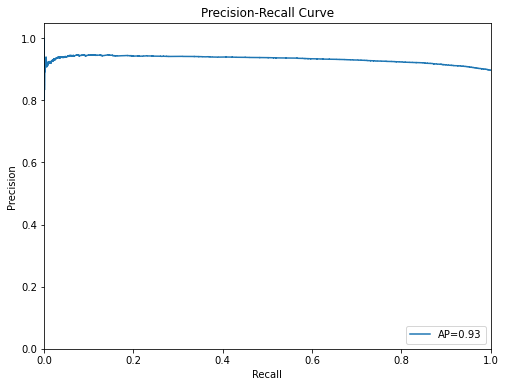

In [12]:
plot_precision_recall_curve(y_val, y_prob)

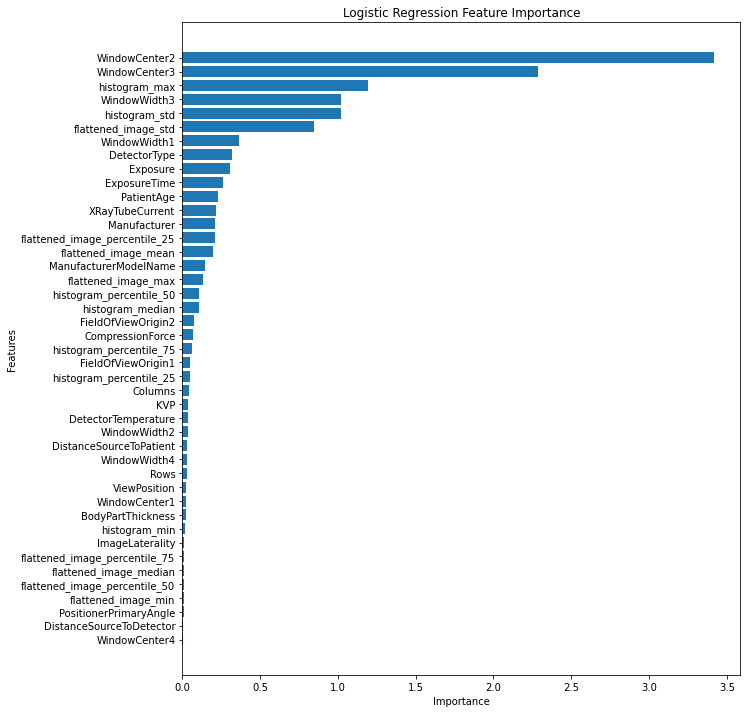

In [13]:
# Assuming 'log_reg' is your trained Logistic Regression model and 'X_train' is your training dataset
coef = log_reg.coef_[0]
feature_names = X_train.columns
plot_logistic_regression_feature_importance(coef, feature_names)

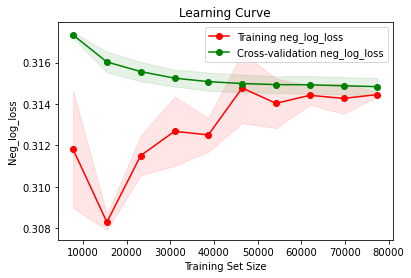

In [14]:
plot_learning_curve(log_reg, X_train, y_train, train_sizes, cv, scoring)

## Logistic Regresssion - Second attempt

### Using balanced dataset

In [15]:
csv_path2 = "labels/features_balanced_scaled.csv"

In [16]:
features2 = pd.read_csv(csv_path2)

In [17]:
features2.drop(columns=[
    'label', 'score', 'coords1', 'coords2', 'coords3', 'coords4',
    'resized_coords1', 'resized_coords2', 'resized_coords3',
    'resized_coords4', 'ExposureInuAs', 'histogram_mean'
], inplace=True)

In [18]:
features2.columns

Index(['ImageLaterality', 'PatientAge', 'Manufacturer',
       'ManufacturerModelName', 'DistanceSourceToDetector',
       'DistanceSourceToPatient', 'ExposureTime', 'XRayTubeCurrent',
       'Exposure', 'KVP', 'BodyPartThickness', 'CompressionForce',
       'PositionerPrimaryAngle', 'ViewPosition', 'DetectorTemperature',
       'DetectorType', 'Rows', 'Columns', 'target_label', 'FieldOfViewOrigin1',
       'FieldOfViewOrigin2', 'WindowCenter1', 'WindowCenter2', 'WindowCenter3',
       'WindowCenter4', 'WindowWidth1', 'WindowWidth2', 'WindowWidth3',
       'WindowWidth4', 'histogram_median', 'histogram_std', 'histogram_min',
       'histogram_max', 'histogram_percentile_25', 'histogram_percentile_50',
       'histogram_percentile_75', 'flattened_image_mean',
       'flattened_image_median', 'flattened_image_std', 'flattened_image_min',
       'flattened_image_max', 'flattened_image_percentile_25',
       'flattened_image_percentile_50', 'flattened_image_percentile_75'],
      dtype='ob

In [19]:
# Separate the features and target label
X2 = features2.drop('target_label', axis=1)
y2 = features2['target_label']

In [20]:
# Split the data into training, validation, and test sets
X_train2, X_temp2, y_train2, y_temp2 = train_test_split(X2, y2, test_size=0.4, random_state=42)
X_val2, X_test2, y_val2, y_test2 = train_test_split(X_temp2, y_temp2, test_size=0.5, random_state=42)

In [21]:
# Initialize the Logistic Regression model
log_reg2 = LogisticRegression(max_iter=2000)

# Fit the model
log_reg2.fit(X_train2, y_train2)

# Validate the model
y_val_pred2 = log_reg2.predict(X_val2)
print(classification_report(y_val2, y_val_pred2))

              precision    recall  f1-score   support

           0       0.61      0.61      0.61      3243
           1       0.63      0.62      0.62      3370

    accuracy                           0.62      6613
   macro avg       0.62      0.62      0.62      6613
weighted avg       0.62      0.62      0.62      6613



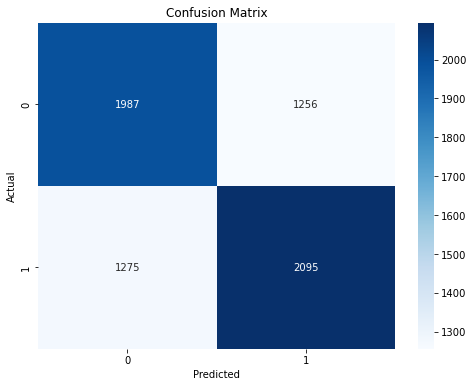

In [22]:
plot_confusion_matrix(y_val2, y_val_pred2)

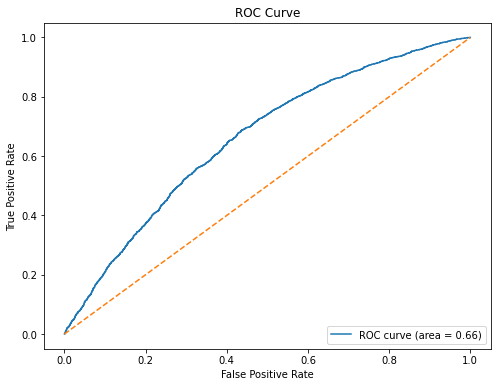

In [23]:
y_prob2 = log_reg2.predict_proba(X_val2)[:, 1]
plot_roc_curve(y_val2, y_prob2)

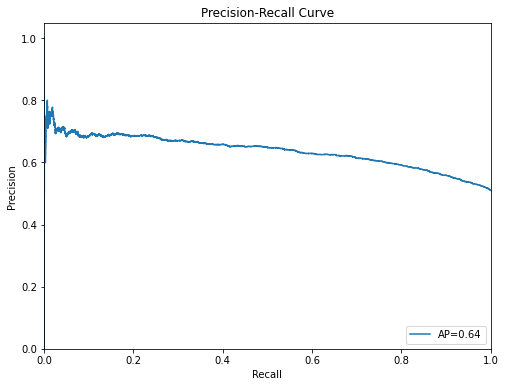

In [24]:
plot_precision_recall_curve(y_val2, y_prob2)

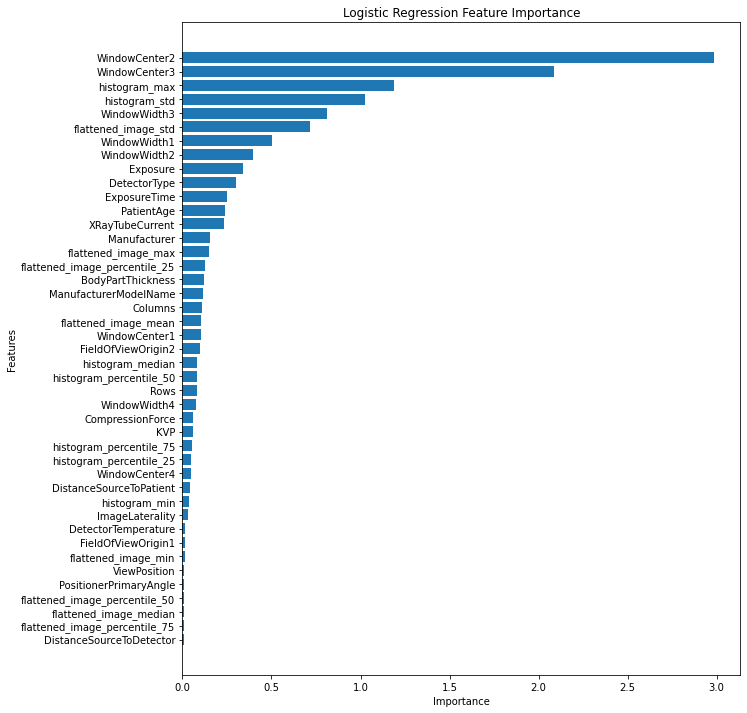

In [25]:
# Assuming 'log_reg' is your trained Logistic Regression model and 'X_train' is your training dataset
coef2 = log_reg2.coef_[0]
feature_names2 = X_train2.columns
plot_logistic_regression_feature_importance(coef2, feature_names2)

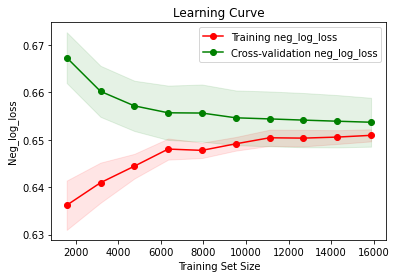

In [26]:
plot_learning_curve(log_reg2, X_train2, y_train2, train_sizes, cv, scoring)

## Logistic Regresssion - Third attempt

### Using balanced dataset with multiplicatve features

In [27]:
csv_path3 = "labels/features_balanced_scaled_mult.csv"

In [28]:
features3 = pd.read_csv(csv_path3)

In [29]:
features3.drop(columns=[
    'label', 'coords1', 'coords2', 'coords3', 'coords4',
    'resized_coords1', 'resized_coords2', 'resized_coords3',
    'resized_coords4', 'ExposureInuAs', 'histogram_mean'
], inplace=True)

In [30]:
features3.columns

Index(['ImageLaterality', 'PatientAge', 'Manufacturer',
       'ManufacturerModelName', 'DistanceSourceToDetector',
       'DistanceSourceToPatient', 'ExposureTime', 'XRayTubeCurrent',
       'Exposure', 'KVP', 'BodyPartThickness', 'CompressionForce',
       'PositionerPrimaryAngle', 'ViewPosition', 'DetectorTemperature',
       'DetectorType', 'Rows', 'Columns', 'score', 'target_label',
       'FieldOfViewOrigin1', 'FieldOfViewOrigin2', 'WindowCenter1',
       'WindowCenter2', 'WindowCenter3', 'WindowCenter4', 'WindowWidth1',
       'WindowWidth2', 'WindowWidth3', 'WindowWidth4', 'histogram_median',
       'histogram_std', 'histogram_min', 'histogram_max',
       'histogram_percentile_25', 'histogram_percentile_50',
       'histogram_percentile_75', 'flattened_image_mean',
       'flattened_image_median', 'flattened_image_std', 'flattened_image_min',
       'flattened_image_max', 'flattened_image_percentile_25',
       'flattened_image_percentile_50', 'flattened_image_percentile_75',


In [31]:
# Separate the features and target label
X3 = features3.drop('target_label', axis=1)
y3 = features3['target_label']

In [32]:
# Split the data into training, validation, and test sets
X_train3, X_temp3, y_train3, y_temp3 = train_test_split(X3, y3, test_size=0.4, random_state=42)
X_val3, X_test3, y_val3, y_test3 = train_test_split(X_temp3, y_temp3, test_size=0.5, random_state=42)

In [33]:
# Initialize the Logistic Regression model
log_reg3 = LogisticRegression(max_iter=2000)

# Fit the model
log_reg3.fit(X_train3, y_train3)

# Validate the model
y_val_pred3 = log_reg3.predict(X_val3)
print(classification_report(y_val3, y_val_pred3))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      3243
           1       0.88      0.89      0.88      3370

    accuracy                           0.88      6613
   macro avg       0.88      0.88      0.88      6613
weighted avg       0.88      0.88      0.88      6613



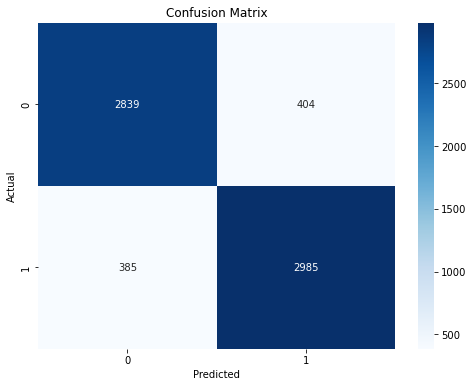

In [34]:
plot_confusion_matrix(y_val3, y_val_pred3)

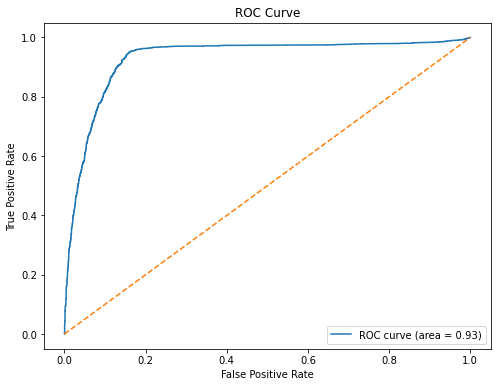

In [35]:
y_prob3 = log_reg3.predict_proba(X_val3)[:, 1]
plot_roc_curve(y_val3, y_prob3)

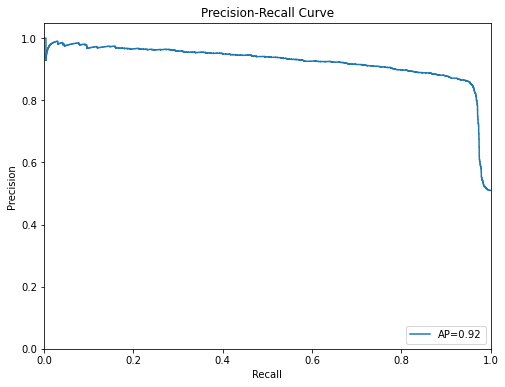

In [36]:
plot_precision_recall_curve(y_val3, y_prob3)

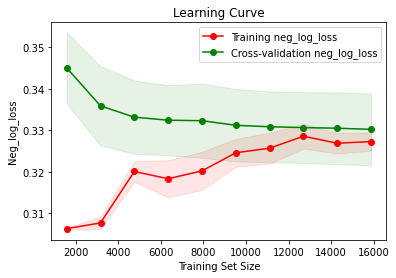

In [37]:
plot_learning_curve(log_reg3, X_train3, y_train3, train_sizes, cv, scoring)

## Error Anaylsis

In [38]:
misclassified_indices1 = np.where(y_val_pred != y_val)[0]
misclassified_indices2 = np.where(y_val_pred2 != y_val2)[0]
misclassified_indices3 = np.where(y_val_pred3 != y_val3)[0]

In [39]:
misclassified_examples1 = X_val.iloc[misclassified_indices1]
misclassified_examples2 = X_val2.iloc[misclassified_indices2]
misclassified_examples3 = X_val3.iloc[misclassified_indices3]

In [40]:
key_features = [
    'ImageLaterality', 'PatientAge', 'Manufacturer',
    'ManufacturerModelName', 'DistanceSourceToDetector',
    'DistanceSourceToPatient', 'ExposureTime', 'XRayTubeCurrent',
    'Exposure', 'KVP', 'BodyPartThickness', 'CompressionForce',
    'PositionerPrimaryAngle', 'ViewPosition', 'DetectorTemperature',
    'DetectorType', 'Rows', 'Columns', 'FieldOfViewOrigin1',
    'FieldOfViewOrigin2', 'WindowCenter1', 'WindowCenter2', 'WindowCenter3',
    'WindowCenter4', 'WindowWidth1', 'WindowWidth2', 'WindowWidth3',
    'WindowWidth4', 'histogram_median', 'histogram_std', 'histogram_min',
    'histogram_max', 'histogram_percentile_25', 'histogram_percentile_50',
    'histogram_percentile_75', 'flattened_image_mean',
    'flattened_image_median', 'flattened_image_std', 'flattened_image_min',
    'flattened_image_max', 'flattened_image_percentile_25',
    'flattened_image_percentile_50', 'flattened_image_percentile_75'
]

In [41]:
# Extract key features from misclassified examples
misclassified_key_features1 = misclassified_examples1[key_features]
misclassified_key_features2 = misclassified_examples2[key_features]
misclassified_key_features3 = misclassified_examples3[key_features]

In [42]:
# Convert to hashable format for comparison
misclassified_hashes1 = set(misclassified_key_features1.apply(lambda row: tuple(row), axis=1))
misclassified_hashes2 = set(misclassified_key_features2.apply(lambda row: tuple(row), axis=1))
misclassified_hashes3 = set(misclassified_key_features3.apply(lambda row: tuple(row), axis=1))


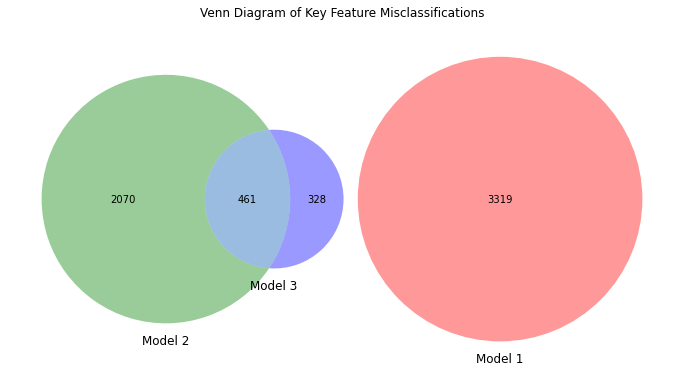

In [43]:
# Venn diagram to visualize common and unique misclassifications
plt.figure(figsize=(12, 12))
venn3([misclassified_hashes1, misclassified_hashes2, misclassified_hashes3], ('Model 1', 'Model 2', 'Model 3'))
plt.title("Venn Diagram of Key Feature Misclassifications")
plt.show()
